In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

# 1. Dataset

In [25]:
# Cargamos el dataset desde el link
nba = pd.read_csv('../DataSets/estadisticas_nba.csv')

In [26]:
# Vemos 10 registros al azar
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
244,Jaren Jackson Jr.,C,20,MEM,57,28.50,4.60,1.40,0.70,1.60,17.40
251,DaQuan Jeffries,SG,22,SAC,13,10.80,1.40,0.50,0.30,0.10,3.80
376,Kyle O'Quinn,C,29,PHI,29,10.80,4.00,1.80,0.20,0.80,3.50
316,Kelan Martin,SF,24,MIN,31,16.00,3.10,0.70,0.20,0.30,6.40
471,Tristan Thompson,PF,28,CLE,57,30.20,10.10,2.10,0.60,0.90,12.00
523,Thaddeus Young,PF,31,CHI,64,24.90,4.90,1.80,1.40,0.40,10.30
508,Hassan Whiteside,C,30,POR,67,30.00,13.50,1.20,0.40,2.90,15.50
68,Dillon Brooks,SG,24,MEM,73,28.90,3.30,2.10,0.90,0.40,16.20
304,Trey Lyles,PF,24,SAS,63,20.20,5.70,1.10,0.40,0.40,6.40
27,RJ Barrett,SG,19,NYK,56,30.40,5.00,2.60,1.00,0.30,14.30


El dataset contiene las siguientes variables:

* **player**: nombre del jugador
* **position**: posicion que juega el jugador
* **age**: edad
* **team_id**: equipo
* **g**: cantidad de partidos jugados
* **mp_per_g**: minutos por partido
* **trb_per_g**: rebotes por partido
* **ast_per_g**: asistencias por partido
* **stl_per_g**:robos por partido
* **blk_per_g**:tapas/bloqueos por partido
* **pts_per_g**:puntos por partido

Conozcamos la distribucion de las variables numericas del dataset

In [27]:
nba.describe()

,age,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
count,529.00,529.00,529.00,529.00,529.00,529.00,529.00,529.00
mean,25.56,42.33,19.51,3.63,1.92,0.62,0.40,8.73
std,4.12,22.63,9.21,2.48,1.76,0.40,0.41,6.37
min,19.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,22.00,22.00,12.00,1.90,0.80,0.30,0.10,3.90
50%,25.00,48.00,18.90,3.20,1.40,0.60,0.30,7.00
75%,28.00,62.00,27.80,4.70,2.40,0.90,0.50,11.90
max,43.00,74.00,37.50,15.20,10.20,2.10,2.90,34.30


# 2. Discretización

Se nos solicita realizar un analisis de ciertas categorías de jugadores en base a las siguiente logica:

A) Para la edad: los jugadores de menos de 22 años son novatos, los que tienen entre 22 y 25 años son jovenes, los que tienen entre 25 y 33 años son adultos y los que tiene 33 años o más son veteranos

B) Para los puntos por partido dividirlos en 4 categorías de tal manera que aproximadamente el 25% de los jugadores quede en cada grupo 

C) Para la cantidad de partidos dividirlos en 3 grupos a intervalos regulares de partidos



## 2.1 Edad

Las categorías son:

* novato: hasta 22 años
* joven: desde 22 hasta 25 años
* adulto: desde 25 hasta 33 años
* veterano: desde 33 años

¿Qué función debemos usar? ¿Qué argumentos debemos definir?

In [28]:
# Definimos los limites de los intervalos, bines
bins_edad = [18, 22, 25, 33, np.inf]

# Lista de categorías
etiquetas_edad =  ['novato', 'joven', 'adulto', 'veterano']

In [29]:
# Discretizamos la variable de edad
pd.cut(x=nba['age'],bins=bins_edad, labels=etiquetas_edad)

0        adulto
1        novato
2      veterano
3         joven
4        novato
         ...   
524      novato
525      adulto
526      adulto
527       joven
528      novato
Name: age, Length: 529, dtype: category
Categories (4, object): ['novato' < 'joven' < 'adulto' < 'veterano']

Ahora que ya tenemos nuestras categorías, podemos crear una nueva variable con la población discretizada

In [30]:
# Creamos la nueva variable
nba['cat_edad'] = pd.cut(x=nba['age'], bins=bins_edad, labels=etiquetas_edad)

In [31]:
# Observamos la nueva columna
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,cat_edad
245,Josh Jackson,SF,22,MEM,22,17.30,3.00,1.60,0.80,0.40,9.00,novato
161,Michael Frazier,SG,25,HOU,13,11.20,0.80,0.20,0.20,0.00,2.10,joven
323,T.J. McConnell,PG,27,IND,71,18.70,2.70,5.00,0.80,0.20,6.50,adulto
21,Dwayne Bacon,SG,24,CHO,39,17.60,2.60,1.30,0.60,0.10,5.70,joven
401,Mason Plumlee,C,29,DEN,61,17.30,5.20,2.50,0.50,0.60,7.20,adulto
213,Willy Hernangómez,C,25,CHO,31,12.10,4.30,0.90,0.30,0.20,6.10,joven
362,Larry Nance Jr.,PF,27,CLE,56,26.30,7.30,2.20,1.00,0.40,10.10,adulto
503,Paul Watson,SF,25,TOT,10,8.70,1.70,0.80,0.40,0.10,3.10,joven
477,Gary Trent Jr.,SF,21,POR,61,21.80,1.60,1.00,0.80,0.30,8.90,novato
485,Denzel Valentine,SF,26,CHI,36,13.60,2.10,1.20,0.70,0.20,6.80,adulto


## 2.2 Puntos por partido

Hay que dividirlos en 4 categorías de tal manera que aproximadamente el 25% de los jugadores quede en cada grupo

¿Qué función debemos usar? ¿Qué argumentos debemos definir?

In [32]:
# Discretizamos la variable de puntos por partido
pd.qcut(x=nba['pts_per_g'], q=4)

0        (7.0, 11.9]
1       (11.9, 34.3]
2       (11.9, 34.3]
3      (-0.001, 3.9]
4         (3.9, 7.0]
           ...      
524     (11.9, 34.3]
525      (7.0, 11.9]
526    (-0.001, 3.9]
527       (3.9, 7.0]
528      (7.0, 11.9]
Name: pts_per_g, Length: 529, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 3.9] < (3.9, 7.0] < (7.0, 11.9] < (11.9, 34.3]]

¿Qué observamos en estos intervalos?



In [33]:
# Definamos una lista de etiquetas para facilitar analisis posterior
etiquetas_puntos = ['muy_pocos_puntos',
                    'pocos_puntos', 'anotador_casual', 'goleador']

In [34]:
# Creamos la nueva variable
nba['cat_puntos'] = pd.cut(x=nba['g'], bins=4, labels=etiquetas_puntos)

In [35]:
# Observemos nuestros datos
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,cat_edad,cat_puntos
390,Chandler Parsons,PF,31,ATL,5,10.80,1.40,0.60,0.80,0.20,2.80,adulto,muy_pocos_puntos
337,C.J. Miles,SF,32,WAS,10,16.10,1.20,1.20,1.00,0.40,6.40,adulto,muy_pocos_puntos
75,Jalen Brunson,PG,23,DAL,57,17.90,2.40,3.30,0.40,0.10,8.20,joven,goleador
336,Eric Mika,C,25,SAC,1,19.00,7.00,0.00,0.00,0.00,6.00,joven,muy_pocos_puntos
528,Ivica Zubac,C,22,LAC,72,18.40,7.50,1.10,0.20,0.90,8.30,novato,goleador
484,Jonas Valančiūnas,C,27,MEM,70,26.40,11.30,1.90,0.40,1.10,14.90,adulto,goleador
312,Lauri Markkanen,PF,22,CHI,50,29.80,6.30,1.50,0.80,0.50,14.70,novato,anotador_casual
409,Bobby Portis,PF,24,NYK,66,21.10,5.10,1.50,0.50,0.30,10.10,joven,goleador
289,Jalen Lecque,SG,19,PHO,5,6.40,0.40,0.40,0.00,0.00,2.00,novato,muy_pocos_puntos
187,Javonte Green,SG,26,BOS,48,9.80,1.90,0.50,0.50,0.20,3.40,adulto,anotador_casual


## 2.3 Cantidad de partidos

Hay que dividirlos en 3 grupos a intervalos regulares de partidos

¿Qué función debemos usar? ¿Qué argumentos debemos definir?

In [36]:
# Discretizamos la variable de puntos por partido
pd.cut(x=nba['g'], bins=3)

0        (49.667, 74.0]
1        (49.667, 74.0]
2        (49.667, 74.0]
3       (0.927, 25.333]
4      (25.333, 49.667]
             ...       
524      (49.667, 74.0]
525      (49.667, 74.0]
526     (0.927, 25.333]
527     (0.927, 25.333]
528      (49.667, 74.0]
Name: g, Length: 529, dtype: category
Categories (3, interval[float64, right]): [(0.927, 25.333] < (25.333, 49.667] < (49.667, 74.0]]

¿Qué observamos en estos intervalos?




In [37]:
# Definamos una lista de etiquetas para facilitar analisis posterior
etiquetas_partidos = ['partidos_bajo', 'partidos_medio', 'partidos_alto']

In [38]:
# Creamos la nueva variable
nba['cat_partidos'] = pd.cut(x=nba['g'], bins=3, labels=etiquetas_partidos)

In [53]:
# Observemos nuestros datos
nba.sample(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,cat_edad,cat_puntos,cat_partidos
269,Luke Kennard,SG,23,DET,28,32.90,3.50,4.10,0.40,0.20,15.80,joven,pocos_puntos,partidos_medio
520,Christian Wood,PF,24,DET,62,21.40,6.30,1.00,0.50,0.90,13.10,joven,goleador,partidos_alto
136,Sekou Doumbouya,PF,19,DET,38,19.80,3.10,0.50,0.50,0.20,6.40,novato,anotador_casual,partidos_medio
198,Maurice Harkless,PF-SF,26,TOT,62,23.00,3.90,1.10,0.90,0.50,5.80,adulto,goleador,partidos_alto
495,Lonnie Walker,SG,21,SAS,61,16.20,2.30,1.10,0.50,0.20,6.40,novato,goleador,partidos_alto
389,Jabari Parker,PF,24,TOT,38,24.10,5.60,1.80,1.20,0.40,14.00,joven,anotador_casual,partidos_medio
517,Zion Williamson,PF,19,NOP,24,27.80,6.30,2.10,0.70,0.40,22.50,novato,pocos_puntos,partidos_bajo
493,Dion Waiters,SG,28,TOT,10,20.70,2.40,2.00,0.40,0.60,11.10,adulto,muy_pocos_puntos,partidos_bajo
117,Jae Crowder,SF-PF,29,TOT,65,28.80,5.90,2.50,1.10,0.40,10.50,adulto,goleador,partidos_alto
487,Fred VanVleet,SG,25,TOR,54,35.70,3.80,6.60,1.90,0.30,17.60,joven,anotador_casual,partidos_alto


# 3 Análisis de los datos

Ahora que tenemos las variables con las categorías necesarias necesitamos hacer algunos analisis para responder a ciertas preguntas

### ¿Cuántos jugadores hay en cada posición?

In [50]:
nba[['position']].groupby(by = 'position', observed=True).size().sort_values(ascending = False)

position
SG       118
C        107
PF       105
PG        91
SF        89
PF-C       5
PF-SF      3
SF-PF      3
SF-SG      2
SG-PG      2
C-PF       1
PG-SG      1
SF-C       1
SG-SF      1
dtype: int64

### ¿Cuántos jugadores hay en cada categoría de edad? ¿Y en cada categoría de partidos jugados?

In [51]:
nba[['cat_edad']].groupby(
    by='cat_edad', observed=True).size().sort_values(ascending=False)

cat_edad
adulto      211
joven       152
novato      142
veterano     24
dtype: int64

In [52]:
nba[['cat_partidos']].groupby(
    by='cat_partidos', observed=True).size().sort_values(ascending=False)

cat_partidos
partidos_alto     259
partidos_bajo     148
partidos_medio    122
dtype: int64

### ¿Cuántos jugadores hay en cada grupo conformado por la categoría de edad y de puntos?

In [55]:
nba[['cat_edad','cat_puntos']].groupby(
    by=['cat_edad','cat_puntos'], observed=True).size()

cat_edad  cat_puntos      
novato    muy_pocos_puntos     46
          pocos_puntos         20
          anotador_casual      25
          goleador             51
joven     muy_pocos_puntos     43
          pocos_puntos         28
          anotador_casual      31
          goleador             50
adulto    muy_pocos_puntos     31
          pocos_puntos         27
          anotador_casual      44
          goleador            109
veterano  muy_pocos_puntos      4
          pocos_puntos          4
          anotador_casual       7
          goleador              9
dtype: int64

## Opcionales

### Observemos graficamente la cantidad de jugadores por categoria de edad y de puntos

<Axes: xlabel='cat_edad', ylabel='cantidad'>

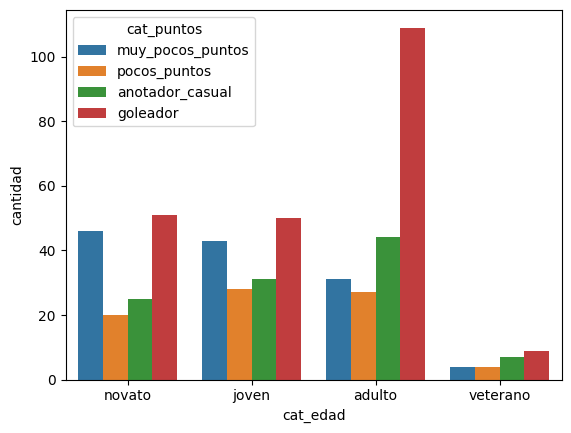

In [57]:
# Graficamos
cantidad_edad_puntos = nba.groupby(['cat_edad', 'cat_puntos'], observed = True).agg(
    cantidad=('player', 'count')).reset_index()
sns.barplot(x='cat_edad', y='cantidad',
            hue='cat_puntos', data=cantidad_edad_puntos)

### Evaluar cómo quedan los intervalos de puntos por partido si creamos los intervalos con el criterio de igual ancho 

¿Difieren mucho de los creados con el criterio anterior?

In [58]:
# Discretizamos la variable de puntos por partido
pd.cut(x=nba['pts_per_g'], bins=4)

0        (8.575, 17.15]
1        (8.575, 17.15]
2       (17.15, 25.725]
3      (-0.0343, 8.575]
4      (-0.0343, 8.575]
             ...       
524      (25.725, 34.3]
525      (8.575, 17.15]
526    (-0.0343, 8.575]
527    (-0.0343, 8.575]
528    (-0.0343, 8.575]
Name: pts_per_g, Length: 529, dtype: category
Categories (4, interval[float64, right]): [(-0.0343, 8.575] < (8.575, 17.15] < (17.15, 25.725] < (25.725, 34.3]]

### Evaluar cómo quedan los intervalos de puntos por partido si creamos los intervalos creando un histograma utilizando los métodos de sturges y de la raiz cuadrada 

¿Difieren mucho de los creados con el criterio anterior?


In [59]:
np.histogram(a=nba['pts_per_g'], bins='sturges')

(array([100, 130, 108,  75,  40,  29,  24,   9,   8,   5,   1], dtype=int64),
 array([ 0.        ,  3.11818182,  6.23636364,  9.35454545, 12.47272727,
        15.59090909, 18.70909091, 21.82727273, 24.94545455, 28.06363636,
        31.18181818, 34.3       ]))

In [60]:
np.histogram(a=nba['pts_per_g'], bins='sqrt')

(array([32, 57, 59, 71, 64, 39, 42, 34, 24, 19, 19, 10, 17, 14,  7,  6,  2,
         4,  3,  3,  2,  0,  1], dtype=int64),
 array([ 0.        ,  1.49130435,  2.9826087 ,  4.47391304,  5.96521739,
         7.45652174,  8.94782609, 10.43913043, 11.93043478, 13.42173913,
        14.91304348, 16.40434783, 17.89565217, 19.38695652, 20.87826087,
        22.36956522, 23.86086957, 25.35217391, 26.84347826, 28.33478261,
        29.82608696, 31.3173913 , 32.80869565, 34.3       ]))